In [5]:
%precision %.2f
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)
import pandas as pd
import numpy as np
from datetime import date

import src.compute.tickets as tickets
import src.compute.changelogs as changelogs
from src.compute.utils import Interval, statuses_of_interest
from src.db.utils import SnowflakeWrapper
from src.config import data_root

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
conn = SnowflakeWrapper.create_snowflake_connection()
sw = SnowflakeWrapper(conn)

In [6]:
active_interval: Interval = Interval(
    # fromDate=date(2019, 7, 1), # year, month, day
    # toDate=date(2019, 10, 1),
    fromDate=date(2019, 10, 1), # year, month, day
    toDate=date(2020, 1, 1)
)
print("Active interval:", active_interval)

Active interval: ('2019-10-01', '2020-01-01')


In [7]:
tickets_active_on_interval = changelogs.tickets_active_on_interval(sw, active_interval)
print(f"Number of tickets active on {active_interval}: {len(tickets_active_on_interval)}")

Number of tickets active on ('2019-10-01', '2020-01-01'): 2969


In [8]:
by_status = tickets.get_tickets_by_status(sw, active_interval)
status = "Development"
by_day = by_status[status]["AVG_DAYS"]
# by_day = by_status[status]["AVG_HOUR"]
# chosen_ticket = by_status.loc['<TICKET_ID>', :]

Working on BACKLOG...
Working on Backlog...
Working on CR On Hold...
Working on Cancelled...
Working on Code review...
Working on Development...
Working on Development Backlog...
Working on Development On Hold...
Working on Done...
Working on IN BACKLOG...
Working on In Backlog...
Working on In Planning...
Working on In Progress...
Working on In QA Review...
Working on In Research...
Working on In Review...
Working on In development...
Working on In master...
Working on Live...
Working on Master...
Working on Needs CR fixes...
Working on Needs PR fixes...
Working on Needs QA Feedback...
Working on Needs QA fixes...
Working on Needs SR feedback...
Working on Needs fixes...
Working on Needs review feedback...
Working on Not Started...
Working on On Hold...
Working on PR On Hold...
Working on Pending Approval...
Working on Pending Product review...
Working on Pending QA Review...
Working on Pending Review...
Working on Product review...
Working on Ready for Work...
Working on Ready for de

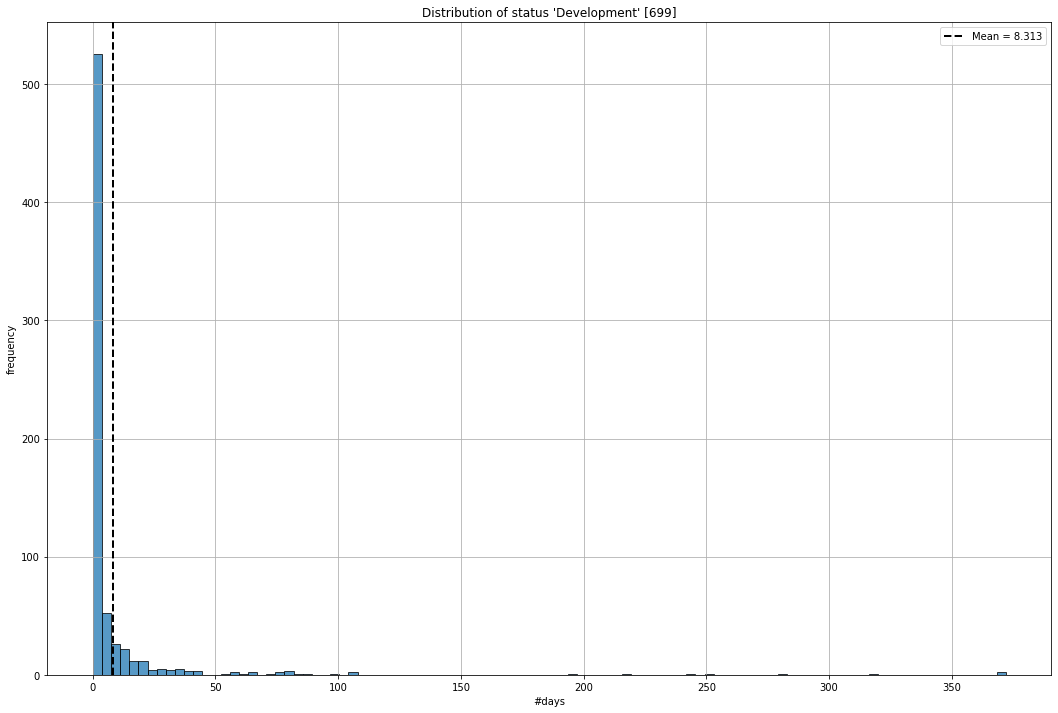

In [9]:
num_bins = 100
fig = plt.figure()
plt.hist(by_day, bins=num_bins, alpha=0.75, edgecolor='black')
# plt.xticks(np.arange(np.ceil(by_day.min()) - 2,np.ceil(by_day.max()) + 2,1))
plt.axvline(by_day.mean(), color='black', linestyle='dashed', linewidth=2, label=f"Mean = {by_day.mean():.3f}")
# plt.axvline(chosen_ticket["AVG_HOUR"], color='g', linestyle='dashed', linewidth=2, label=f'Chosen user = {chosen_user["AVG_HOUR"]:.3f}')

plt.title(f"Distribution of status '{status}' [{len(by_day)}]")
plt.xlabel("#days")
plt.ylabel("frequency")
plt.legend()
plt.grid()
plt.savefig(f"{data_root}/figs/dev_comparison_{status}_hist.png")
plt.show()
